# Анализ данных средствами pandas

Нашей целью будет изучить статистику рапределения минимальной оплаты труда по странам мира. Для этого нам потребуется:
* загрузить данные из внешнего источника
* преобразовать таблицу к удобному формату
* дополнить таблицу вспомоготельными сведениями
* построить графики распределения минимальной оплаты труда в различных разрезах.

## Подготовка данных

Любой анализ данных начинается с подготовки данных. Загрузим таблицу в csv формате со внешнего источника.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv')

In [2]:
realwage.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


### Создание сводной таблицы

Из плоской таблицы ```realwage``` с помощью метода метода [```pivot_table```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) сделайте сводную таблицу, в которой:
* колонки объединены по принципу Country, Series, Pay period
* строки индексируются параметром Time.

Ожидаемый результат:

In [3]:
realwage = realwage.pivot_table(index='Time', columns=['Country', 'Series', 'Pay period'])
realwage.head()

Unnamed: 0         \
Country                                   Australia          
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                       88     99   
2007-01-01                                       89    100   
2008-01-01                                       90    101   
2009-01-01                                       91    102   
2010-01-01                                       92    103   

                                                                      \
Country                                                                
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                                110    121   
2007-01-01                                                111    122   
2008-01-01                                                112    123   
2009-01-01                                                113    124   
2010-01-01                                                114    125   

                                                            \
Country                                     Belgium          
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                     1056   1067   
2007-01-01                                     1057   1068   
2008-01-01                                     1058   1069   
2009-01-01                                     1059   1070   
2010-01-01                                     1060   1071   

                                                                      \
Country                                                                
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                               1078   1089   
2007-01-01                                               1079   1090   
2008-01-01                                               1080   1091   
2009-01-01                                               1081   1092   
2010-01-01                                               1082   1093   

                                                            ...    \
Country                                      Brazil         ...     
Series     In 2015 constant prices at 2015 USD PPPs         ...     
Pay period                                   Annual Hourly  ...     
Time                                                        ...     
2006-01-01                                     1144   1155  ...     
2007-01-01                                     1145   1156  ...     
2008-01-01                                     1146   1157  ...     
2009-01-01                                     1147   1158  ...     
2010-01-01                                     1148   1159  ...     

                                                        value         \
Country                                                Turkey          
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                           4,741.16   2.27   
2007-01-01                                           4,710.42   2.26   
2008-01-01                                           4,635.16   2.22   
2009-01-01                                           4,753.90   2.28   
2010-01-01        

### Приведение типов

В колонке Time, как можно убедиться, сейчас стоят строковые значения:

In [4]:
realwage.index

Index([u'2006-01-01', u'2007-01-01', u'2008-01-01', u'2009-01-01',
       u'2010-01-01', u'2011-01-01', u'2012-01-01', u'2013-01-01',
       u'2014-01-01', u'2015-01-01', u'2016-01-01'],
      dtype='object', name=u'Time')

С помощью метода [```to_datetime```](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) переведите тип в ```datetime```. Для данных в формате ```datetime``` определены такие понятися, как год, месяц, час, минута и т.д. Например, распечатайте только года.

Ожидаемый результат:

In [5]:
realwage.index = pd.to_datetime(realwage.index)
realwage.index.year

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name=u'Time')

### Работа со сводной таблицей

Выведите названия уровней сводной таблицы

In [6]:
realwage.columns.levels

FrozenList([[u'Unnamed: 0', u'value'], [u'Australia', u'Belgium', u'Brazil', u'Canada', u'Chile', u'Colombia', u'Costa Rica', u'Czech Republic', u'Estonia', u'France', u'Germany', u'Greece', u'Hungary', u'Ireland', u'Israel', u'Japan', u'Korea', u'Latvia', u'Lithuania', u'Luxembourg', u'Mexico', u'Netherlands', u'New Zealand', u'Poland', u'Portugal', u'Russian Federation', u'Slovak Republic', u'Slovenia', u'Spain', u'Turkey', u'United Kingdom', u'United States'], [u'In 2015 constant prices at 2015 USD PPPs', u'In 2015 constant prices at 2015 USD exchange rates'], [u'Annual', u'Hourly']])

Выведите часть таблицы, относящуюся к United States

In [7]:
realwage['value']['United States']

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   
2011-01-01                                15,889.70   7.64   
2012-01-01                                15,567.55   7.48   
2013-01-01                                15,342.81   7.38   
2014-01-01                                15,097.89   7.26   
2015-01-01                                15,080.00   7.25   
2016-01-01                                14,892.12   7.16   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  
2011-01-01                                          15,889.70   7.64  
2012-01-01                                          15,567.55   7.48  
2013-01-01                                          15,342.81   7.38  
2014-01-01                                          15,097.89   7.26  
2015-01-01                                          15,080.00   7.25  
2016-01-01                                          14,892.12   7.16

Преобразуйте таблицу методом ```stack``` так, чтобы градация Pay period переместилась из стотлбцов в строки. 

Ожидаемый результат:

In [8]:
realwage_reshaped = realwage.stack(level=-1)
realwage_reshaped.head()

Unnamed: 0  \
Country                                              Australia   
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                           88   
           Hourly                                           99   
2007-01-01 Annual                                           89   
           Hourly                                          100   
2008-01-01 Annual                                           90   

                                                                          \
Country                                                                    
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                                    110   
           Hourly                                                    121   
2007-01-01 Annual                                                    111   
           Hourly                                                    122   
2008-01-01 Annual                                                    112   

                                                                \
Country                                                Belgium   
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                         1056   
           Hourly                                         1067   
2007-01-01 Annual                                         1057   
           Hourly                                         1068   
2008-01-01 Annual                                         1058   

                                                                          \
Country                                                                    
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                                   1078   
           Hourly                                                   1089   
2007-01-01 Annual                                                   1079   
           Hourly                                                   1090   
2008-01-01 Annual                                                   1080   

                                                                \
Country                                                 Brazil   
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                         1144   
           Hourly                                         1155   
2007-01-01 Annual                                         1145   
           Hourly                                         1156   
2008-01-01 Annual                                         1146   

                                                                          \
Country                                                                    
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                                   1166   
           Hourly                                                   1177   
2007-01-01 Annual                                                   1167   
           Hourly                                                   1178   
2008-01-01 Annual                                                   1168   

                                                                \
Country                                                 Canada   
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay

Проделайте аналогичное, переместив градации Country и Pay period из стотлбцов в строки. Вывести результат только за 2015 год.

Ожидаемый результат:

In [9]:
sliced_realwage = realwage.stack(level=-1)
sliced_realwage = sliced_realwage.stack(level=1)
sliced_realwage = sliced_realwage.loc['2015']
sliced_realwage.head()

Unnamed: 0  \
Series                          In 2015 constant prices at 2015 USD PPPs   
Time       Pay period Country                                              
2015-01-01 Annual     Australia                                       97   
                      Belgium                                       1065   
                      Brazil                                        1153   
                      Canada                                         845   
                      Chile                                          977   

                                                                                    \
Series                          In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period Country                                                        
2015-01-01 Annual     Australia                                                119   
                      Belgium                                                 1087   
                      Brazil                                                  1175   
                      Canada                                                   867   
                      Chile                                                    999   

                                                                   value  \
Series                          In 2015 constant prices at 2015 USD PPPs   
Time       Pay period Country                                              
2015-01-01 Annual     Australia                                21,715.53   
                      Belgium                                  21,588.12   
                      Brazil                                    4,628.63   
                      Canada                                   16,536.83   
                      Chile                                     6,633.56   

                                                                                    
Series                          In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period Country                                                       
2015-01-01 Annual     Australia                                          25,349.90  
                      Belgium                                            20,753.48  
                      Brazil                                              2,842.28  
                      Canada                                             17,367.24  
                      Chile                                               4,251.49

Сформируйте плоскую таблицу, в которой
* по столбцам Country
* по строкам Time
* в ячейках - значения Hourly.

Это можно сделать с помощью метода [```xs```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html). Ожидаемый результат:

In [10]:
realwage.head()

Unnamed: 0         \
Country                                   Australia          
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                       88     99   
2007-01-01                                       89    100   
2008-01-01                                       90    101   
2009-01-01                                       91    102   
2010-01-01                                       92    103   

                                                                      \
Country                                                                
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                                110    121   
2007-01-01                                                111    122   
2008-01-01                                                112    123   
2009-01-01                                                113    124   
2010-01-01                                                114    125   

                                                            \
Country                                     Belgium          
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                     1056   1067   
2007-01-01                                     1057   1068   
2008-01-01                                     1058   1069   
2009-01-01                                     1059   1070   
2010-01-01                                     1060   1071   

                                                                      \
Country                                                                
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                               1078   1089   
2007-01-01                                               1079   1090   
2008-01-01                                               1080   1091   
2009-01-01                                               1081   1092   
2010-01-01                                               1082   1093   

                                                            ...    \
Country                                      Brazil         ...     
Series     In 2015 constant prices at 2015 USD PPPs         ...     
Pay period                                   Annual Hourly  ...     
Time                                                        ...     
2006-01-01                                     1144   1155  ...     
2007-01-01                                     1145   1156  ...     
2008-01-01                                     1146   1157  ...     
2009-01-01                                     1147   1158  ...     
2010-01-01                                     1148   1159  ...     

                                                        value         \
Country                                                Turkey          
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                           4,741.16   2.27   
2007-01-01                                           4,710.42   2.26   
2008-01-01                                           4,635.16   2.22   
2009-01-01                                           4,753.90   2.28   
2010-01-01        

In [11]:
realwage_f = realwage.stack(-1).stack(-1).xs('Hourly', level=1, drop_level=1)
realwage_f.index = realwage_f.index.droplevel(1)
realwage_f.columns = realwage_f.columns.droplevel(0)
realwage_f.head()

Country,Australia,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Estonia,France,...,New Zealand,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,99,1067,1155,847,979,1331,1375,803,671,495,...,7.49,3.41,3.73,0.56,2.49,5.40,4.82,4.07,8.07,6.05
2006-01-01,121,1089,1177,869,1001,1353,1397,825,693,517,...,8.44,1.69,2.79,0.23,1.50,3.92,3.99,2.27,9.81,6.05
2007-01-01,100,1068,1156,848,980,1332,1376,804,672,496,...,7.98,3.46,3.80,1.08,2.71,5.34,4.95,4.04,8.29,6.24
2007-01-01,122,1090,1178,870,1002,1354,1398,826,694,518,...,8.99,1.71,2.84,0.45,1.64,3.88,4.10,2.26,10.07,6.24
2008-01-01,101,1069,1157,849,981,1333,1377,805,673,497,...,8.24,4.00,3.91,0.94,2.84,5.47,5.00,3.98,8.26,6.78


### Объединение таблиц

Ближайшая цель - добавить к каждой стране в таблице ```realwage_f``` название контитента. 

Для начала загрузим вспомогательную таблицу, в которой есть названия стран и континентов.

In [12]:
worlddata = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/countries.csv', sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,nan,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.30,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,nan,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.30,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,nan,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.00,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,nan,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.10,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,nan,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.00,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


Оставьте в ```worlddata``` только колонки Country (en) и Continent и переименуйте первую в Country. 

Ожидаемый результат:

In [13]:
worlddata_f = worlddata[['Country (en)', 'Continent']]
worlddata_f['Country'] = worlddata['Country (en)']
worlddata_f = worlddata_f[['Country', 'Continent']]
worlddata_f.head()

/home/delta37/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [14]:
worlddata_f.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


Чтобы объединить таблицы, в них должны быть одинаковые колонки. В ```worlddata``` страны идут по строкам, а в ```realwage_f``` по столбцам. Необходимо преобразовать ```realwage_f``` к виду, в котором страны тоже идут по строкам.

Ожидаемый результат:

In [15]:
realwage_f = realwage_f.transpose()
realwage_f = realwage_f.groupby('Country').mean()
realwage_f.head()

Time,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2012-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
Country,,,,,,,,,,,,,,,,,,,,,
Australia,54.67,66.53,55.34,67.23,55.74,67.62,56.31,68.20,56.79,68.67,...,57.90,69.80,58.41,70.32,58.93,70.84,59.50,71.42,60.06,71.99
Belgium,538.54,549.35,539.11,549.91,539.63,550.44,540.31,551.10,540.73,551.53,...,541.68,552.48,542.22,553.02,542.70,553.50,543.18,553.97,543.58,554.38
Brazil,578.21,588.93,578.75,589.46,579.28,589.98,579.84,590.51,580.40,591.04,...,581.45,592.09,582.00,592.61,582.50,593.11,583.00,593.61,583.50,594.12
Canada,426.78,437.95,427.31,438.48,427.95,439.12,428.65,439.84,429.28,440.47,...,430.36,441.56,430.89,442.09,431.41,442.61,431.98,443.18,432.54,443.74
Chile,490.61,501.21,491.13,501.73,491.62,502.22,492.19,502.76,492.70,503.28,...,493.75,504.31,494.35,504.86,494.90,505.38,495.40,505.90,496.00,506.45


Теперь все готово для объединения: есть две таблицы с общей колонкой. Добавьте к таблице  ```realwage_f``` по ключу Country соответствующие значения из таблицы ```worlddata```. Воспользуйтесь методом [```merge```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). Обратить внимание на параметры:
* how
* left_index
* right_on.

Результатом должна стать следующая табличка:

In [16]:
realwage_f.head()

Time,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2012-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
Country,,,,,,,,,,,,,,,,,,,,,
Australia,54.67,66.53,55.34,67.23,55.74,67.62,56.31,68.20,56.79,68.67,...,57.90,69.80,58.41,70.32,58.93,70.84,59.50,71.42,60.06,71.99
Belgium,538.54,549.35,539.11,549.91,539.63,550.44,540.31,551.10,540.73,551.53,...,541.68,552.48,542.22,553.02,542.70,553.50,543.18,553.97,543.58,554.38
Brazil,578.21,588.93,578.75,589.46,579.28,589.98,579.84,590.51,580.40,591.04,...,581.45,592.09,582.00,592.61,582.50,593.11,583.00,593.61,583.50,594.12
Canada,426.78,437.95,427.31,438.48,427.95,439.12,428.65,439.84,429.28,440.47,...,430.36,441.56,430.89,442.09,431.41,442.61,431.98,443.18,432.54,443.74
Chile,490.61,501.21,491.13,501.73,491.62,502.22,492.19,502.76,492.70,503.28,...,493.75,504.31,494.35,504.86,494.90,505.38,495.40,505.90,496.00,506.45


In [32]:
worlddata_f.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [33]:
df = pd.merge(realwage_f, worlddata_f, how='left', left_index=True, right_on='Country')
df

,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,Country,Continent
17,54.67,66.53,55.34,67.23,55.74,67.62,56.31,68.20,56.79,68.67,...,58.41,70.32,58.93,70.84,59.50,71.42,60.06,71.99,Australia,Australia
23,538.54,549.35,539.11,549.91,539.63,550.44,540.31,551.10,540.73,551.53,...,542.22,553.02,542.70,553.50,543.18,553.97,543.58,554.38,Belgium,Europe
32,578.21,588.93,578.75,589.46,579.28,589.98,579.84,590.51,580.40,591.04,...,582.00,592.61,582.50,593.11,583.00,593.61,583.50,594.12,Brazil,South America
100,426.78,437.95,427.31,438.48,427.95,439.12,428.65,439.84,429.28,440.47,...,430.89,442.09,431.41,442.61,431.98,443.18,432.54,443.74,Canada,North America
38,490.61,501.21,491.13,501.73,491.62,502.22,492.19,502.76,492.70,503.28,...,494.35,504.86,494.90,505.38,495.40,505.90,496.00,506.45,Chile,South America
108,666.57,677.00,667.08,677.51,667.58,678.00,668.11,678.52,668.60,679.03,...,670.20,680.55,670.70,681.07,671.20,681.57,671.70,682.06,Colombia,South America
41,"1,375.00","1,397.00","1,376.00","1,398.00","1,377.00","1,399.00","1,378.00","1,400.00","1,379.00","1,401.00",...,"1,382.00","1,404.00",693.20,703.71,693.80,704.28,694.35,704.82,Costa Rica,Central America
225,403.49,413.64,404.01,414.15,404.39,414.58,404.87,415.07,405.34,415.55,...,406.76,417.00,407.31,417.53,407.96,418.12,408.58,418.69,Czech Republic,Europe
53,336.74,347.33,337.40,347.93,338.03,348.52,338.53,349.02,338.99,349.49,...,340.53,351.01,341.20,351.63,341.87,352.24,342.56,352.87,Estonia,Europe
58,252.80,263.56,253.36,264.11,253.87,264.62,254.46,265.21,254.92,265.68,...,256.51,267.26,257.04,267.79,257.58,268.33,258.11,268.85,France,Europe


Но есть проблема. В таблице ```worlddata``` присутствуют не все страны, что есть в ```realwage_f```. Для отсутствующих стран значение в столбце Country становится NaN. Нужно вывести строки, для которых не нашлось соответствия.

Ожидаемый результат:

In [34]:
non_matched = df[df['Continent'].isnull()]
non_matched

,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,Country,Continent
247,447.36,458.21,448.04,458.87,448.61,459.44,449.18,460.00,449.68,460.50,...,451.39,462.19,452.03,462.82,452.69,463.47,453.38,464.14,Korea,NaN
247,599.78,610.62,600.54,611.22,600.97,611.70,601.80,612.33,602.24,612.81,...,603.74,614.31,604.23,614.80,604.68,615.28,605.16,615.77,Russian Federation,NaN
247,204.74,215.25,205.36,215.82,205.92,216.36,206.56,216.94,207.12,217.48,...,208.73,219.04,209.23,219.54,209.73,220.04,210.23,220.54,Slovak Republic,NaN


Отсутствующие значения придется добавлять руками. Для этого создадим словарик ```missing_continents```

In [35]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

Метод [```map```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html), примененный к колонке Country, отобразит страны из списка ключей словаря ```missing_continents``` в их значеня: 

In [36]:
df['Country'].map(missing_continents)

17        NaN
23        NaN
32        NaN
100       NaN
38        NaN
108       NaN
41        NaN
225       NaN
53        NaN
58        NaN
45        NaN
68        NaN
233       NaN
86        NaN
88        NaN
91        NaN
247      Asia
117       NaN
122       NaN
123       NaN
138       NaN
153       NaN
151       NaN
174       NaN
175       NaN
247    Europe
247    Europe
198       NaN
200       NaN
227       NaN
241       NaN
240       NaN
Name: Country, dtype: object

Получившейся колонкой хочется дозаполнить колонку Continent из таблицы ```merged```. Воспользуйтель для этого методом [```fillna```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).

Проверьте, результат, например, для Кореи. Выбрав все строки с ```merged['Country'] == 'Korea'```, должен получиться верный результат (колонка Continent заполнена значением Asia):

In [37]:
df[df['Country'] == 'Korea']

,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,Country,Continent
247,447.36,458.21,448.04,458.87,448.61,459.44,449.18,460.00,449.68,460.50,...,451.39,462.19,452.03,462.82,452.69,463.47,453.38,464.14,Korea,NaN


In [38]:
df['Continent'] = df['Continent'].fillna(df['Country'].map(missing_continents))

df[df['Country'] == 'Korea']


,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,Country,Continent
247,447.36,458.21,448.04,458.87,448.61,459.44,449.18,460.00,449.68,460.50,...,451.39,462.19,452.03,462.82,452.69,463.47,453.38,464.14,Korea,Asia


Далее хотим объединить "континетны" Central America, North America, South America в один "континент" America. Воспользуйтесь для этого методом [```replace```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html).

In [39]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    df['Continent'].replace(to_replace=country, value='America', inplace=True)

Логично сделать так, чтобы страны в таблице группировались по принципу расположения на одном контитента и перечислялиь в алфавитном порядке. Преобразуйте таблицу так, чтобы индексировались континентом и страной и были отсортированы в алфавитном порядке. Проще всего это сделать с помощью метода [```set_index```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html).

Ожидаемый результат:

In [40]:
df.head()

,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 00:00:00,...,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,Country,Continent
17,54.67,66.53,55.34,67.23,55.74,67.62,56.31,68.20,56.79,68.67,...,58.41,70.32,58.93,70.84,59.50,71.42,60.06,71.99,Australia,Australia
23,538.54,549.35,539.11,549.91,539.63,550.44,540.31,551.10,540.73,551.53,...,542.22,553.02,542.70,553.50,543.18,553.97,543.58,554.38,Belgium,Europe
32,578.21,588.93,578.75,589.46,579.28,589.98,579.84,590.51,580.40,591.04,...,582.00,592.61,582.50,593.11,583.00,593.61,583.50,594.12,Brazil,South America
100,426.78,437.95,427.31,438.48,427.95,439.12,428.65,439.84,429.28,440.47,...,430.89,442.09,431.41,442.61,431.98,443.18,432.54,443.74,Canada,North America
38,490.61,501.21,491.13,501.73,491.62,502.22,492.19,502.76,492.70,503.28,...,494.35,504.86,494.90,505.38,495.40,505.90,496.00,506.45,Chile,South America


In [41]:
df = df.set_index(['Continent', 'Country']).sort_index()
df.head()

2006-01-01  2006-01-01  2007-01-01  2007-01-01  \
Continent Country                                                     
Asia      Israel         514.06      525.38      514.68      526.01   
          Japan          294.64      305.35      295.18      305.87   
          Korea          447.36      458.21      448.04      458.87   
          Turkey          73.54       83.64       74.02       84.13   
Australia Australia       54.67       66.53       55.34       67.23   

                     2008-01-01  2008-01-01  2009-01-01  2009-01-01  \
Continent Country                                                     
Asia      Israel         515.13      526.46      515.59      526.92   
          Japan          295.70      306.40      296.31      307.00   
          Korea          448.61      459.44      449.18      460.00   
          Turkey          74.49       84.61       75.04       85.14   
Australia Australia       55.74       67.62       56.31       68.20   

                     2010-01-01  2010-01-01     ...      2012-01-01  \
Continent Country                               ...                   
Asia      Israel         516.02      527.34     ...          517.08   
          Japan          296.89      307.57     ...          298.01   
          Korea          449.68      460.50     ...          450.78   
          Turkey          75.56       85.65     ...           76.68   
Australia Australia       56.79       68.67     ...           57.90   

                     2012-01-01  2013-01-01  2013-01-01  2014-01-01  \
Continent Country                                                     
Asia      Israel         528.41      517.64      528.97      518.12   
          Japan          308.68      298.56      309.22      299.03   
          Korea          461.59      451.39      462.19      452.03   
          Turkey          86.72       77.22       87.24       77.75   
Australia Australia       69.80       58.41       70.32       58.93   

                     2014-01-01  2015-01-01  2015-01-01  2016-01-01  \
Continent Country                                                     
Asia      Israel         529.46      518.80      530.16      519.43   
          Japan          309.70      299.58      310.24      300.18   
          Korea          462.82      452.69      463.47      453.38   
          Turkey          87.76       78.41       88.35       79.39   
Australia Australia       70.84       59.50       71.42       60.06   

                     2016-01-01  
Continent Country                
Asia      Israel         530.79  
          Japan          310.83  
          Korea          464.14  
          Turkey          89.12  
Australia Australia       71.99  

[5 rows x 22 columns]

Пара завершающих операций для удобства работы с таблицей:
* поправить даты, убрав из них лишние нули
* преобразовать таюлицу к виду, в котором даты идут по строкам.

Ожидаемый результат:

In [42]:
df.columns = pd.to_datetime(df.columns)
df.columns = df.columns.rename('Time')
df = df.transpose()
df.head()

Continent    Asia                      Australia             Central America  \
Country    Israel  Japan  Korea Turkey Australia New Zealand      Costa Rica   
Time                                                                           
2006-01-01 514.06 294.64 447.36  73.54     54.67      119.24        1,375.00   
2006-01-01 525.38 305.35 458.21  83.64     66.53      130.72        1,397.00   
2007-01-01 514.68 295.18 448.04  74.02     55.34      119.99        1,376.00   
2007-01-01 526.01 305.87 458.87  84.13     67.23      131.50        1,398.00   
2008-01-01 515.13 295.70 448.61  74.49     55.74      120.62        1,377.00   

Continent   Europe                          ...                              \
Country    Belgium Czech Republic Estonia   ...    Slovak Republic Slovenia   
Time                                        ...                               
2006-01-01  538.54         403.49  336.74   ...             204.74   470.20   
2006-01-01  549.35         413.64  347.33   ...             215.25   480.46   
2007-01-01  539.11         404.01  337.40   ...             205.36   470.67   
2007-01-01  549.91         414.15  347.93   ...             215.82   480.94   
2008-01-01  539.63         404.39  338.03   ...             205.92   471.23   

Continent                       North America                       \
Country    Spain United Kingdom        Canada Mexico United States   
Time                                                                 
2006-01-01 29.91         141.53        426.78 159.93        272.53   
2006-01-01 40.50         153.40        437.95 170.77        283.53   
2007-01-01 30.48         142.14        427.31 160.43        273.12   
2007-01-01 41.05         154.03        438.48 171.27        284.12   
2008-01-01 31.00         142.63        427.95 160.93        273.89   

Continent  South America                  
Country           Brazil  Chile Colombia  
Time                                      
2006-01-01        578.21 490.61   666.57  
2006-01-01        588.93 501.21   677.00  
2007-01-01        578.75 491.13   667.08  
2007-01-01        589.46 501.73   677.51  
2008-01-01        579.28 491.62   667.58  

[5 rows x 32 columns]

# Анализ данных
 Изучаем данные в таблице ```merge```.

Выведите среднее значение по странам

In [43]:
merged = df

In [44]:
merged.mean()

Continent        Country           
Asia             Israel                 522.31
                 Japan                  302.75
                 Korea                  455.71
                 Turkey                  81.22
Australia        Australia               63.31
                 New Zealand            128.00
Central America  Costa Rica           1,201.19
Europe           Belgium                546.57
                 Czech Republic         410.98
                 Estonia                344.80
                 France                 260.84
                 Germany              1,025.03
                 Greece                 191.85
                 Hungary                366.89
                 Ireland                 18.10
                 Latvia                 652.67
                 Lithuania              630.71
                 Luxembourg             107.20
                 Netherlands            326.35
                 Poland                 389.19
                 Portuga

Постройте график (столбчатую диаграмму), в котором по горизонтали - страны, по вертикали - средее значение по стране. Отсортируйте по убыванию.  

Ожидаемый результат:

In [47]:
countries = list(merged.columns.levels[1])

In [48]:
import numpy as np
import matplotlib.pyplot as plt
arr = merged.mean().sort_values(ascending=False)
arr = np.array(arr.get_values())
arr

array([ 1201.18863637,  1025.03109545,   674.33750001,   652.66568545,
         630.7110959 ,   607.95285001,   586.21931818,   546.5694166 ,
         522.31042023,   498.53681818,   478.23694773,   455.70782568,
         435.31616162,   410.98130659,   389.19384637,   366.89370818,
         344.80018115,   326.35156463,   302.75201932,   281.07748317,
         260.835095  ,   235.30872045,   212.77682726,   191.85346161,
         167.84971045,   150.02172978,   128.00249068,   107.20394591,
          81.21609703,    63.30845068,    37.79457045,    18.10135956])

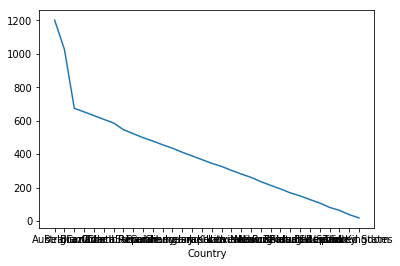

In [49]:
plt.plot(arr)

plt.xticks(range(0, len(countries)), countries)
plt.xlabel('Country')

plt.show()


Постройте график изменения среднего значения по всем странам.

Ожидаемый результат:

In [50]:
plt.show()

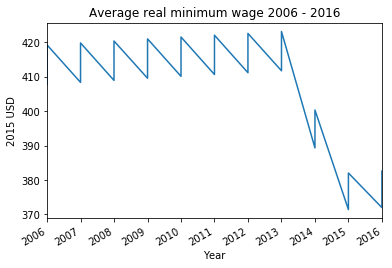

In [53]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

Постройте график изменения среднего значения по каждому континенту, кроме Австралии.

Ожидаемый результат:

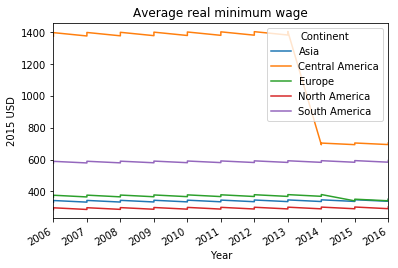

In [52]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()


Выведите таблицу значений минимума, максимаму, среднего, дисперсии и квантилей по континентам America,	Asia, Europe.

Должнв получится такая табличка:

In [ ]:
print(stats)

In [54]:
merged.stack().describe()

Continent,Asia,Central America,Europe,North America,South America
count,88.00,22.00,418.00,66.00,66.00
mean,340.50,"1,201.19",368.07,294.75,586.36
std,170.61,314.91,247.99,110.61,72.53
min,73.54,693.20,9.62,159.93,490.61
25%,243.26,872.36,197.26,173.39,503.93
50%,379.09,"1,379.50",344.94,280.80,586.22
75%,476.62,"1,398.75",541.07,429.67,669.01
max,530.79,"1,404.00","1,141.00",443.74,682.06


Однной строкой выведите колическтво стран по каждому контитенту (метод [```groupby```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html))

In [55]:
grouped = merged.groupby(level='Continent', axis=1)
grouped.size()

Continent
Asia                4
Central America     1
Europe             19
North America       3
South America       3
dtype: int64

Постройте сглаженный график распределения минимальной оплаты труда по каждому континету за 2015 год. Сглаженную гистограмму можно получить, например, с помощью функции [```gaussian_kde```](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html). Для группировки по признаку континента используйте ```groupby```.

Ожидаемый результат:

In [ ]:
plt.show()

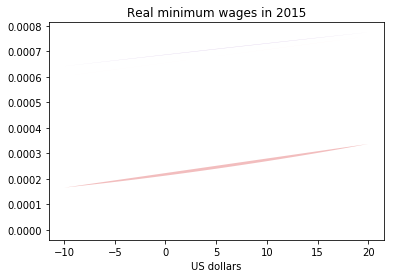

In [56]:
from scipy import stats
import numpy as np
continents = grouped.groups.keys()

x = np.linspace(-10, 20, 100)
for continent in continents:
    kernel = stats.gaussian_kde(grouped.get_group(continent)['2015'].unstack())
    plt.fill(x, kernel(x), alpha=0.3)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()



Сохраните результат в свой репозиторий!